# Lecture 5 - Dynamic programming intro

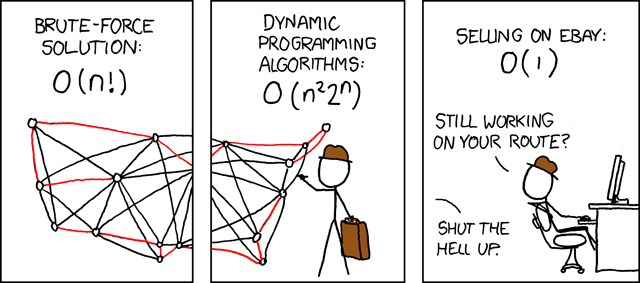

[xkcd](https://xkcd.com/399/)
## 2021/05/19

## Gene 111

## Logistics 

- Jupyter doesn't do spelling, sorry

- Surveys are back, thanks for submitting them; rough concensus is:
    - Homeworks too hard (heard++)
    - Less theory, more programming (heard-ish)
    - Softer intro (definitely a lesson learned)
    - Just do python (ehhh...)
    

- Homework 3 due tonight

- Homework 4 out today, due Friday

- Homework 4 is basic setup of a dynamic programming matrix

- Resubmit. If you need help just email me, we can set a time to work through it


## Hamming distance from last time:


```
Sequence A:  ATGCATGC
Sequence B:  TGCATGCA
Differences: ******** (8)
```
From Compeau and Pevzner

In [1]:
sequence_A = "ATGCATGC"
sequence_B = "TGCATGCA"

def haming_distance_zip(sequence1,sequence2):
    assert len(sequence1) == len(sequence2) # sequence length must be equal
    
    distance = 0
    for base_a,base_b in zip(sequence1.upper(),sequence2.upper()):
        if base_a != base_b:
            distance += 1
    return(distance)

haming_distance_zip(sequence_A,sequence_B)

8

## Alternative alignments


One possible alignment:
    
```
Sequence A:  ATGCATGC-
Sequence B:  -TGCATGCA
Differences: *.......* (2)
```

Other strings, like ATGCTTA and TGCATTAA have more complicated similarities:
    
```
Sequence A:  ATGC-TTA-
Sequence B:  -TGCATTAA
Differences: *...*...* (2)
```

## Can we at least score this?

Very basic scoring scheme:

Pyrimidine/pyrimidine (CT) and purine/purine cost less (AG)
(why the NA?)

| ` | A  | C | G | T | -
| --- | --- |--- |--- |--- |--- |
| A | +5 | -2 | -1 | -2 | -4 |
| C | -2 | +5 | -2 | -1 | -4 |
| G | -1 | -2 | +5 | -2 | -4 |
| T | -2 | -1 | -2 | +5 | -4 |
| - | -4 | -4 | -4 | -4 | NA |

## Setup a way to find our scores

In [2]:
score_lookup = {} # dictionary (hash table)
score_lookup['-A'] = -4 # dash is before A in the ASCII alphabet
score_lookup['AA'] = +5 
score_lookup['AC'] = -2
score_lookup['AG'] = -1
score_lookup['AT'] = -2
score_lookup['-C'] = -4
score_lookup['CC'] = +5
score_lookup['CG'] = -2
score_lookup['CT'] = -1
score_lookup['-G'] = -4
score_lookup['GG'] = +5
score_lookup['GT'] = -2
score_lookup['-T'] = -4
score_lookup['TT'] = +5


## And write a function to look them up for users

In [3]:

def score_alignment_pair(base_a, base_b):
    '''get the score for two aligned bases for asymetric scoring matrix'''
    if base_a < base_b: # we can compare strings
        return(score_lookup[base_a + base_b]) # call our lookup table
    else:
        return(score_lookup[base_b + base_a]) # call our lookup table

print(score_alignment_pair('A','T'))
print(score_alignment_pair('T','A'))
print(score_alignment_pair('-','A'))

-2
-2
-4


## Now score the alignment

In [4]:
sequence_A = "ATGC-TTA-"
sequence_B = "-TGCATTAA"

def score_two_sequences(sequence1,sequence2):
    assert len(sequence1) == len(sequence2) # sequence length must be equal
    
    score = 0
    for base_a,base_b in zip(sequence1.upper(),sequence2.upper()):
        score += score_alignment_pair(base_a,base_b) # function we made above
        
    return(score)

print(score_two_sequences(sequence_A,sequence_B))

sequence_A = "ATGC-TTA-"
sequence_B = "-TaCATaAA"

print(score_two_sequences(sequence_A,sequence_B))

18
5


## Exhaustively explore the space of alignments 

- Maybe we can just make every combination and score them? 
- How many are there?
- Gaps can't exceed the length of A + B, i.e.:

```
Sequence A:  ATGCATGC-------------
Sequence B:  -------------TGCATGCA
```

Doesn't make sense, there's no information to differentiate that alignment from:

```
Sequence A:  ATGCATGC--------
Sequence B:  --------TGCATGCA
```

## Exhaustively explore the space of alignments 

- The order of the input sequences have to stay the same. We're assuming insertions, deletions, and substitutions are the only mechanisms we can use.

- To enumerate the possible alignments then we just need to __choose__ where to put gaps.  Let's look at the longest possible alignment:

```
Sequence A:  ATGCATGC--------
Sequence B:  --------TGCATGCA
```

For sequence A we choose to put the gap symbols in $|A|$ places. Given that the sequences are the same length, we have ${2A \choose A}$* possible global alignments between the two sequences = $\frac{(2A)!}{(A!)^2}$ ~= $\frac{2^{2A}}{\sqrt{	\pi * A}}$

**From Durbin et al.**

## We cannot exhaustively explore the space of alignments 

~= $\frac{2^{2A}}{\sqrt{	\pi * A}}$

At least in a brute force way...

| n | size |
| --- | --- |
| 10 | ~ 187126.4 |
| 20 | ~ 1.40e+11 |
| 100 | ~ 9.068476e+58 | 

## How can we do this in practice then?

In [5]:
# lets use some example sequences from before
sequence_A = "ATGC-TTA-".replace("-","")
sequence_B = "-TGCATTAA".replace("-","")
print(sequence_A)
print(sequence_B)

ATGCTTA
TGCATTAA


### What if we tried building every alignment in a structured way

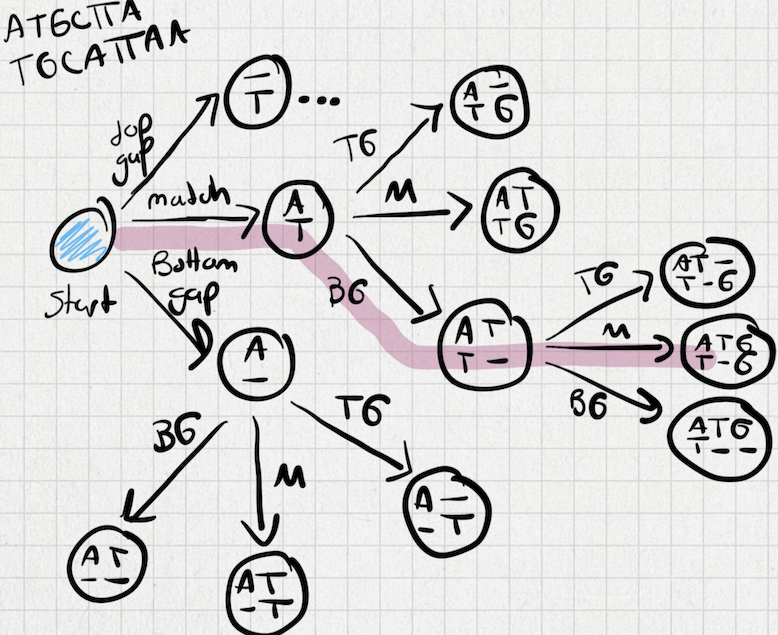

# We could do this 'recursively', like the diagram

### But it's even easier to make a big table to store this redundant information

This is dynamic programming - storing previous results in a structured way for huge efficiency gains

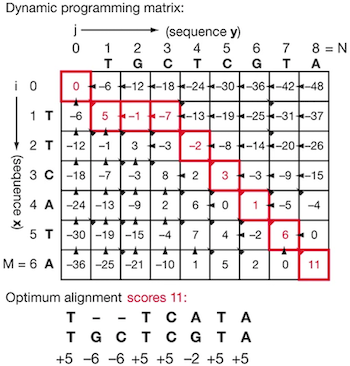

From [Sean Eddy's Nature Biotech piece on DP](https://www.nature.com/articles/nbt0704-909/figures/)

## Let do it in python

In [6]:
import numpy as np

# old friends
sequence_A = "ATGC-TTA-".replace("-","")
sequence_B = "-TGCATTAA".replace("-","")

our_dp_matrix = np.zeros((len(sequence_A) + 1, len(sequence_B) + 1))
print(our_dp_matrix)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]]


## Lets make it easier on the eyes

In [7]:
def pretty_print_alignment(seq_A, seq_B, dp_matrix):
    '''
    This function does a lot of justification (ljust and print) to align the sequence and matrix
    We can copy-paste this into future code to help debug what our matrix is doing
    '''
    print("".join([letter_in_B.rjust(6) for letter_in_B in "-" + seq_B]))

    for row_label, row in zip("-" + seq_A, dp_matrix):
        print(row_label + "".join([str(mat_value).rjust(6) for mat_value in row]))

pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

     -     T     G     C     A     T     T     A     A
-   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
A   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
G   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
C   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
A   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


## Now let's fill in the first row

Each cell represents the alignment of the two sequences to that point, so what's the first row?

In [8]:
gap_cost = -10 # lets just make something up
our_dp_matrix = np.zeros((len(sequence_A) + 1, len(sequence_B) + 1)) # destroy any previous changes

for i in range(0,our_dp_matrix.shape[1]):
    our_dp_matrix[0,i] = i * gap_cost
    
pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

     -     T     G     C     A     T     T     A     A
-   0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0
A   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
G   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
C   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
A   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


## let's fill in the first column

In [9]:
for i in range(0,our_dp_matrix.shape[0]):
    our_dp_matrix[i,0] = i * gap_cost # shifted i and 0 here, rows first
    
pretty_print_alignment(sequence_A,sequence_B,our_dp_matrix)

     -     T     G     C     A     T     T     A     A
-   0.0 -10.0 -20.0 -30.0 -40.0 -50.0 -60.0 -70.0 -80.0
A -10.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T -20.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
G -30.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
C -40.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T -50.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
T -60.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0
A -70.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0


## Now something new

#### In this dynamic programming we're only going to store the best alignment at each position:

$
score(i,j) = \max
\begin{cases} 
      score(i-1,j-1) + \text{our match or mismatch score} \\
      score(i-1,j) + \text{gap cost} \\
      score(i,j -1) + \text{gap cost} \\
   \end{cases}
$

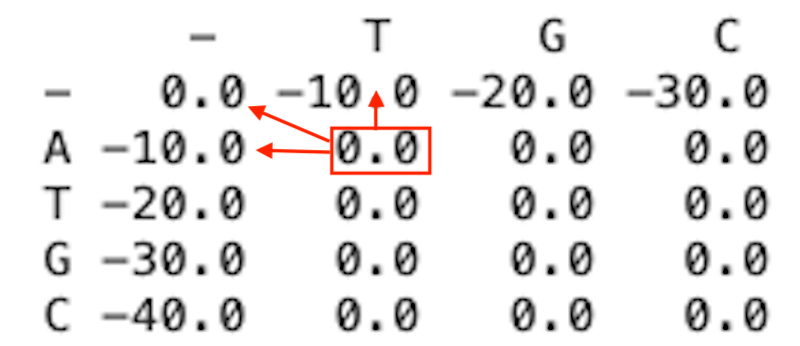

## This DP matrix with contain the maximum score for all possible alignments

- For homework we're going to fill in this matrix, with lots of help

- Next time we'll talk about how to extract the best alignment out

- The following homework will be getting that alignment string from the matrix